In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Genshin_Impact_All_Character_Stat.csv")  # replace with your file path

print(df.head())
print(df.info())
print(df.describe())


  Character  Lv  Rarity Element Weapon Main role Ascension  Base HP  Base ATK  \
0     Amber   1       4    Pyro    Bow   Sub DPS       ATK      793        19   
1     Amber  20       4    Pyro    Bow   Sub DPS       ATK     2038        48   
2     Amber  20       4    Pyro    Bow   Sub DPS       ATK     2630        62   
3     Amber  40       4    Pyro    Bow   Sub DPS       ATK     3940        93   
4     Amber  40       4    Pyro    Bow   Sub DPS       ATK     4361       103   

   Base DEF  
0        50  
1       129  
2       167  
3       250  
4       277  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Character  574 non-null    object
 1   Lv         574 non-null    int64 
 2   Rarity     574 non-null    int64 
 3   Element    574 non-null    object
 4   Weapon     574 non-null    object
 5   Main role  574 non-null    object
 6   Ascensi

In [2]:
# Checking values
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


Character    0
Lv           0
Rarity       0
Element      0
Weapon       0
Main role    0
Ascension    0
Base HP      0
Base ATK     0
Base DEF     0
dtype: int64


/tmp/ipython-input-694512790.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-1894218500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Element", data=df, palette="Set2")


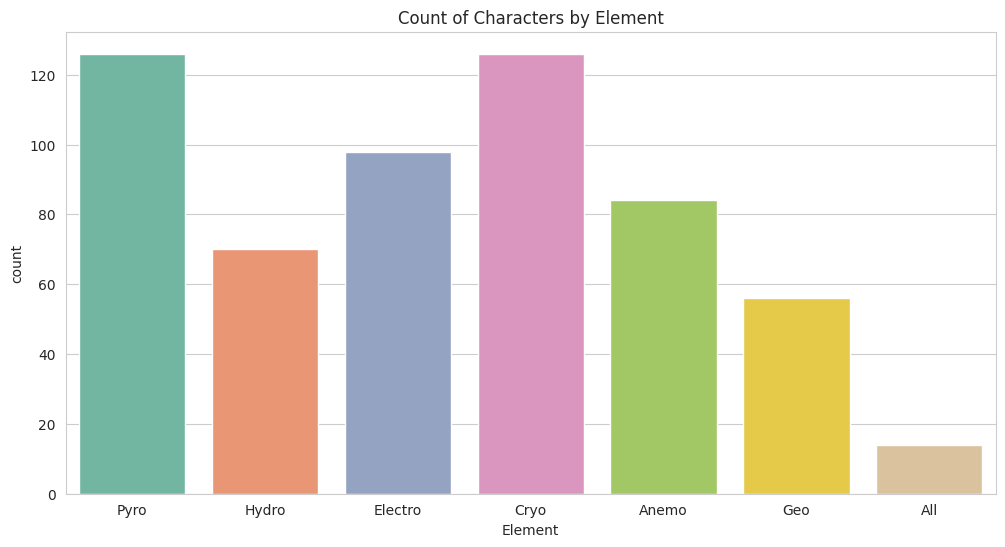

In [5]:
# DATA VISUALIZATION
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="Element", data=df, palette="Set2")
plt.title("Count of Characters by Element")
plt.show()


/tmp/ipython-input-2489284766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Weapon", data=df, palette="pastel")


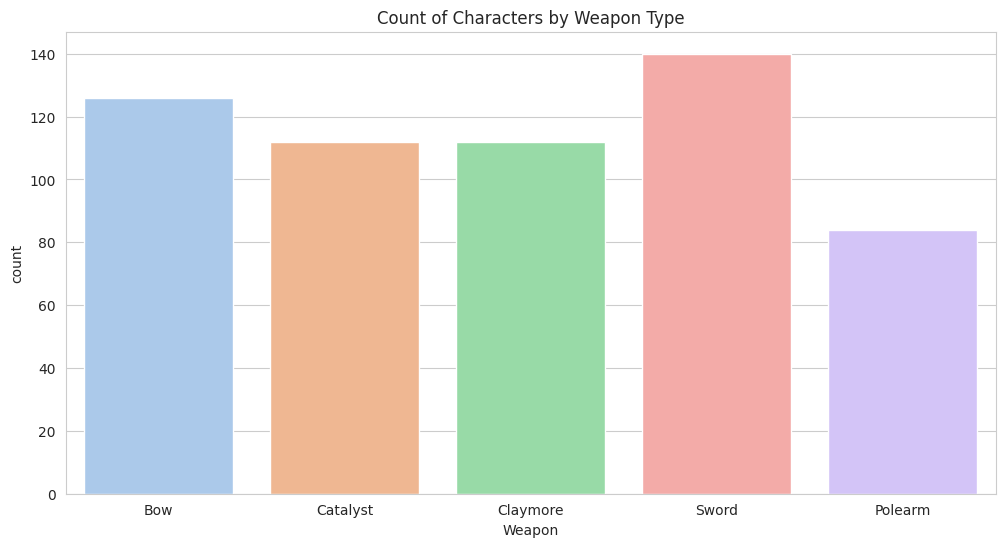

In [6]:

plt.figure(figsize=(12, 6))
sns.countplot(x="Weapon", data=df, palette="pastel")
plt.title("Count of Characters by Weapon Type")
plt.show()


/tmp/ipython-input-2595221252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Element", y="Base HP", data=df, palette="coolwarm")


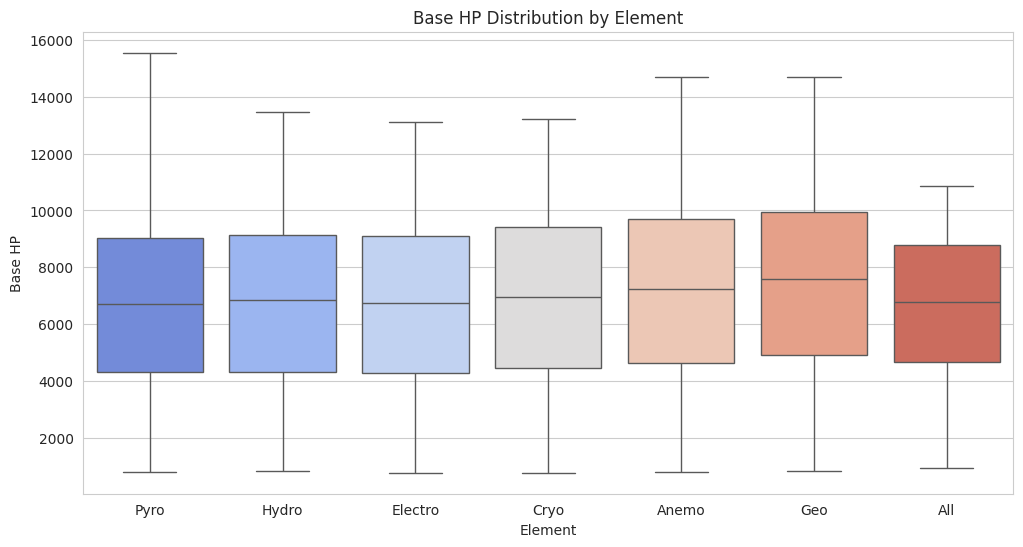

In [7]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Element", y="Base HP", data=df, palette="coolwarm")
plt.title("Base HP Distribution by Element")
plt.show()



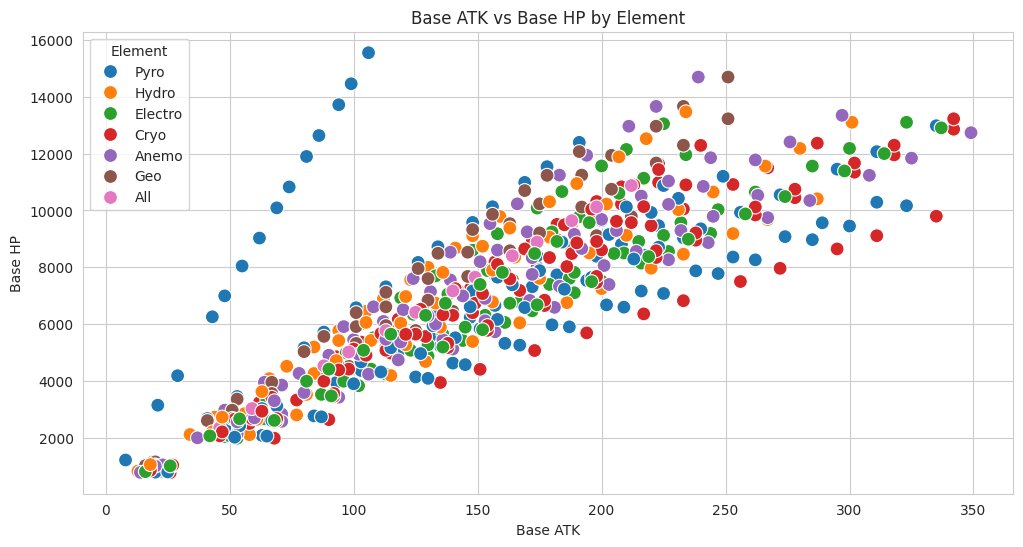

In [8]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Base ATK", y="Base HP", hue="Element", data=df, s=100)
plt.title("Base ATK vs Base HP by Element")
plt.show()


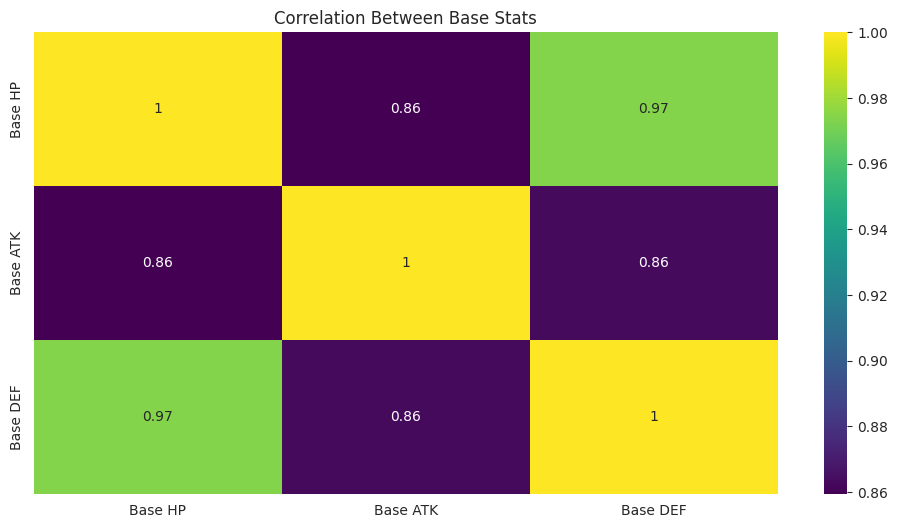

In [9]:

plt.figure(figsize=(12, 6))
sns.heatmap(df[["Base HP", "Base ATK", "Base DEF"]].corr(), annot=True, cmap="viridis")
plt.title("Correlation Between Base Stats")
plt.show()


/tmp/ipython-input-1848034251.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Lv", y="Base HP", hue="Element", data=df, ci=None)


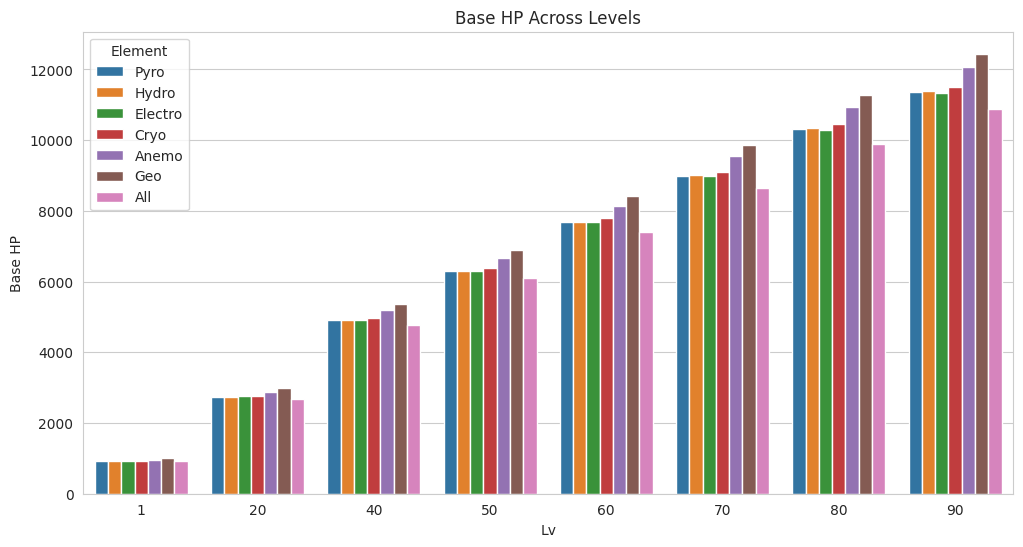

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Lv", y="Base HP", hue="Element", data=df, ci=None)
plt.title("Base HP Across Levels")
plt.show()


/tmp/ipython-input-1975013897.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Lv", y="Base ATK", hue="Element", data=df, ci=None)


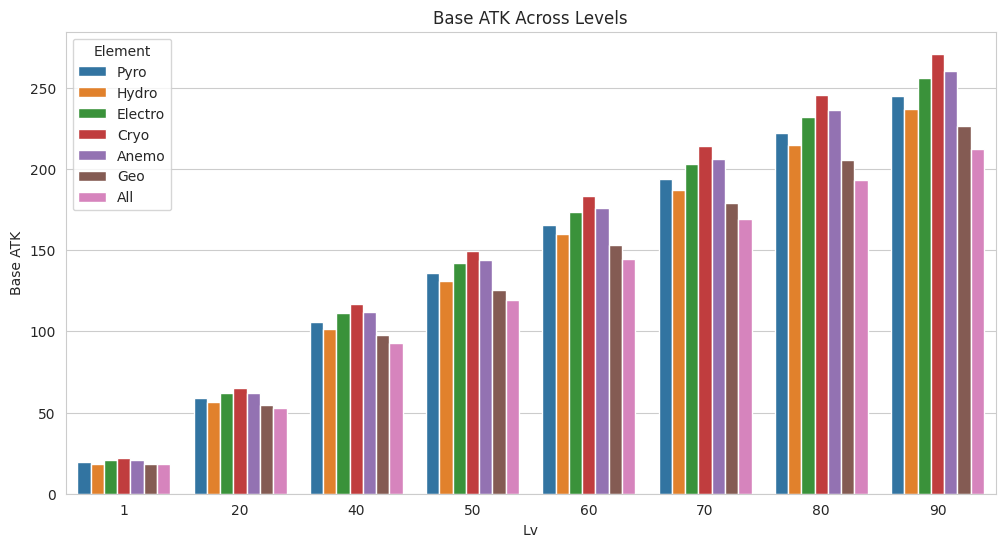

In [11]:

plt.figure(figsize=(12, 6))
sns.barplot(x="Lv", y="Base ATK", hue="Element", data=df, ci=None)
plt.title("Base ATK Across Levels")
plt.show()


/tmp/ipython-input-4215241696.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Lv", y="Base DEF", hue="Element", data=df, ci=None)


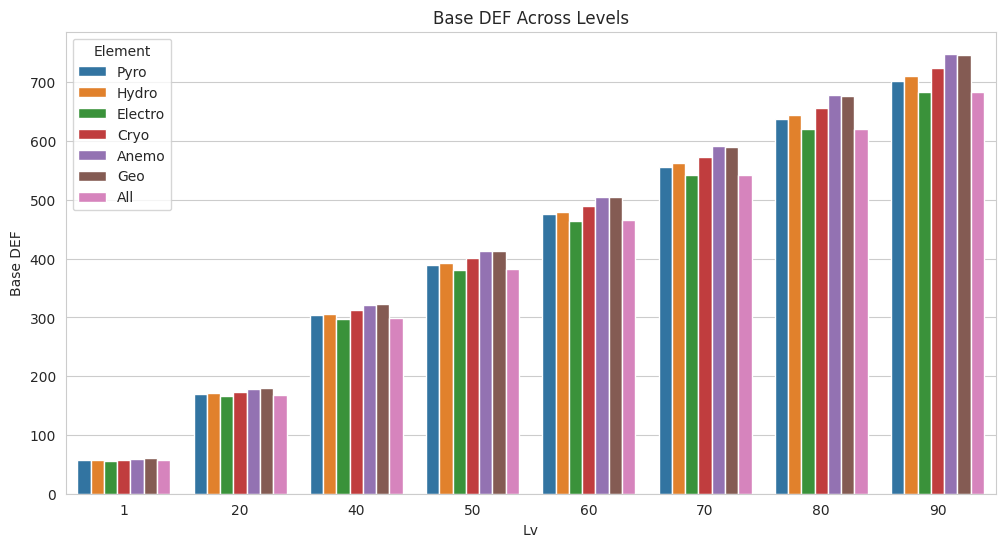

In [12]:

plt.figure(figsize=(12, 6))
sns.barplot(x="Lv", y="Base DEF", hue="Element", data=df, ci=None)
plt.title("Base DEF Across Levels")
plt.show()

Rarity Distribution – Most characters are 4★, fewer are 5★. Game balance seems to favor more accessible characters.

Element Distribution – Elements are fairly balanced, with slight dominance of Pyro and Hydro, suggesting popular meta roles.

Weapon Type Distribution – Swords and Polearms are most common, Bows least frequent, reflecting gameplay style preferences.

Level vs. Base Stats – HP, ATK, DEF increase steadily with level; big jumps occur at ascension points.

Base ATK by Main Role – Main DPS characters have highest ATK; Supports/Healers have lower but balanced stats.

Base HP & DEF by Element – Geo and Hydro users tend to have higher DEF/HP, Pyro and Anemo focus more on ATK.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("/content/Genshin_Impact_All_Character_Stat.csv")

target = 'Element'

X = df.drop(columns=[target])
y = df[target]

label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

example = pd.DataFrame([X.iloc[15]])  # Take first row as an example
pred_class = target_encoder.inverse_transform(model.predict(example))[0]
print(f"Predicted {target}: {pred_class}")


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

         All       1.00      1.00      1.00         6
       Anemo       1.00      1.00      1.00        17
        Cryo       1.00      1.00      1.00        21
     Electro       1.00      1.00      1.00        19
         Geo       1.00      1.00      1.00        14
       Hydro       1.00      1.00      1.00         8
        Pyro       1.00      1.00      1.00        30

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115

Predicted Element: Hydro


In this project, I analyzed character statistics to determine their elemental affinity or main role. Using a supervised machine learning model trained on labeled data, we mapped key stats to their corresponding element categories. The purpose was to explore the relationship between stats and elemental classification, and to build a predictive system for instant role identification. You can change the index and see what characters element is it. My model achieved 100% accuracy, demonstrating that character stats strongly determine their element and that our chosen features and approach are highly effective.  I hope all Genshin Impact players will love it!!!